
# Author : Niv Ben Avraham




[Dataset link](https://www.openml.org/search?type=data&status=active&qualities.NumberOfInstances=between_10000_100000&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=gte_2&id=1044&sort=runs)

# Imports & Meta Data

In [ ]:
!pip install openml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 7.4 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.13.1-py3-none-any.whl size=142784 sha256=966b9e1c45478f9037efd680274270f2c5fb9b5232b4095b0f02e60919330b1e
  Stored in directory: /root/.cache/pip/wheels/f7/7a/fa/f73edc5ccecbab13bbf5fb888f2f943720f77114a1fa4ceffe
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=497fbc5eee992b4b343c53b9b441666cfbe84b21c0cb3bc98722b85495641b66
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [ ]:
import pandas as pd
import openml
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics as metrics
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
covertype = openml.datasets.get_dataset(42477)
X, y, _, _ = covertype.get_data(target=covertype.default_target_attribute, dataset_format='array');
features = [f.name for i,f in covertype.features.items()][:-1]
df = pd.DataFrame(X, columns=features[1:])
classes = covertype.retrieve_class_labels()
df['target'] = y

In [ ]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,target
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.shape

(30000, 24)

## Meta Data
Our dataset represents a case of customer default payments in Taiwan in order to determine whether the customers are trustworthy or untrustworthy.

Feature information:
This study used a binary variable, default payment (yes = 1, no = 0), as the response variable.

This study reviewed the literature and used the following 23 variables as explanatory variables:

**X1**: Amount of credit provided (NT dollars): It includes both personal consumer credit and family credit (supplementary).

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = other).

**X4**: marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: Previous payment history. We tracked past monthly payment records (from April to September, 2005) as follows : X6 = repayment status in September, 2005,  X7 = repayment status August 2005... X11 = repayment status in April, 2005.

The measurement scale for repayment status is: -1 = legal payment; 1 = late payment for one month; 2 = late payment for two months; . . .; 8 = late payment for eight months; 9 = payment late by nine months or more.

**X12-X17**: Account statement amount (NT dollars) :
X12 = amount of statement of account in September, 2005,  X13 = Account statement amount in August, 2005, ..... X17 = Account statement amount in April, 2005.


**X18-X23**: Previous payment amount (NT dollars) :  X18 = amount paid in September 2005, X19 = amount paid in August 2005... X23 = amount paid in April, 2005.

# 1. Business Understanding

###**Can we accurately predict credit card default among individuals in Taiwan based on their demographic characteristics and payment history?**

This research question focuses on developing a predictive model to classify individuals as either defaulters or non-defaulters based on their demographic information (such as gender, education, marital status, and age) as well as their payment history (past monthly payment records and bill statements). By training a classification algorithm on the dataset, the study aims to determine the feasibility of accurately predicting credit card default in the Taiwanese population using these variables. The research question can help evaluate the potential of machine learning techniques for credit risk assessment and provide insights into the key factors contributing to credit card default in Taiwan.

# 2. Data Understanding

In [ ]:
df.isna().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
x9        0
x10       0
x11       0
x12       0
x13       0
x14       0
x15       0
x16       0
x17       0
x18       0
x19       0
x20       0
x21       0
x22       0
x23       0
target    0
dtype: int64

**Insight 1 :** Our DF contains no rows with empty values.


---



**Insight 2 :** By reading the met data we conclude that the following features are categorical features: X2, X3, X4.

Therefore, we will convert the content into a categorical variable

In [ ]:
nominal_cols = ['x2','x3','x4','target']
df[nominal_cols] = df[nominal_cols].astype('category',copy=True)

In [ ]:
df.dtypes

x1         float32
x2        category
x3        category
x4        category
x5         float32
x6         float32
x7         float32
x8         float32
x9         float32
x10        float32
x11        float32
x12        float32
x13        float32
x14        float32
x15        float32
x16        float32
x17        float32
x18        float32
x19        float32
x20        float32
x21        float32
x22        float32
x23        float32
target    category
dtype: object

<Axes: xlabel='target', ylabel='x6'>

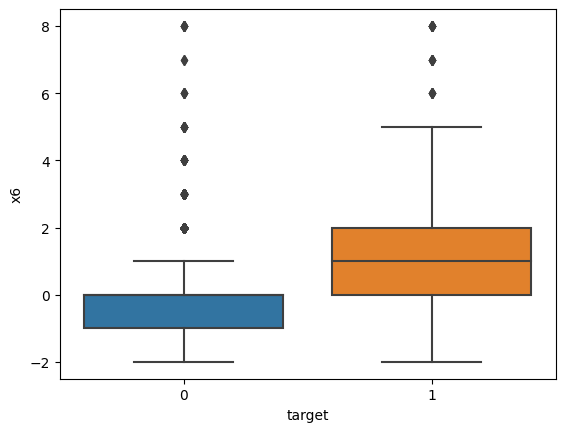

In [ ]:
sns.boxplot(data = df, x= 'target',y='x6')

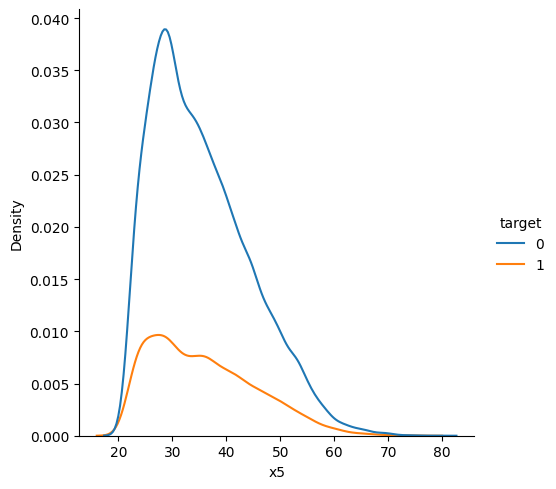

In [ ]:
sns.displot(x=df['x5'],hue=df['target'],kind="kde")

<Axes: ylabel='target'>

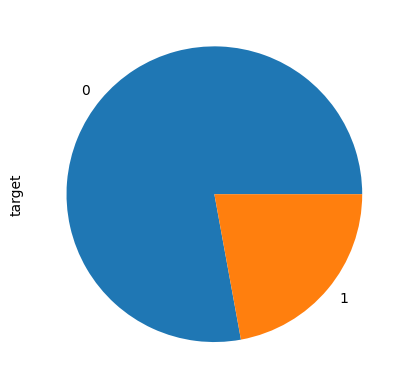

In [ ]:
df['target'].value_counts().plot(kind='pie')



---



<Axes: >

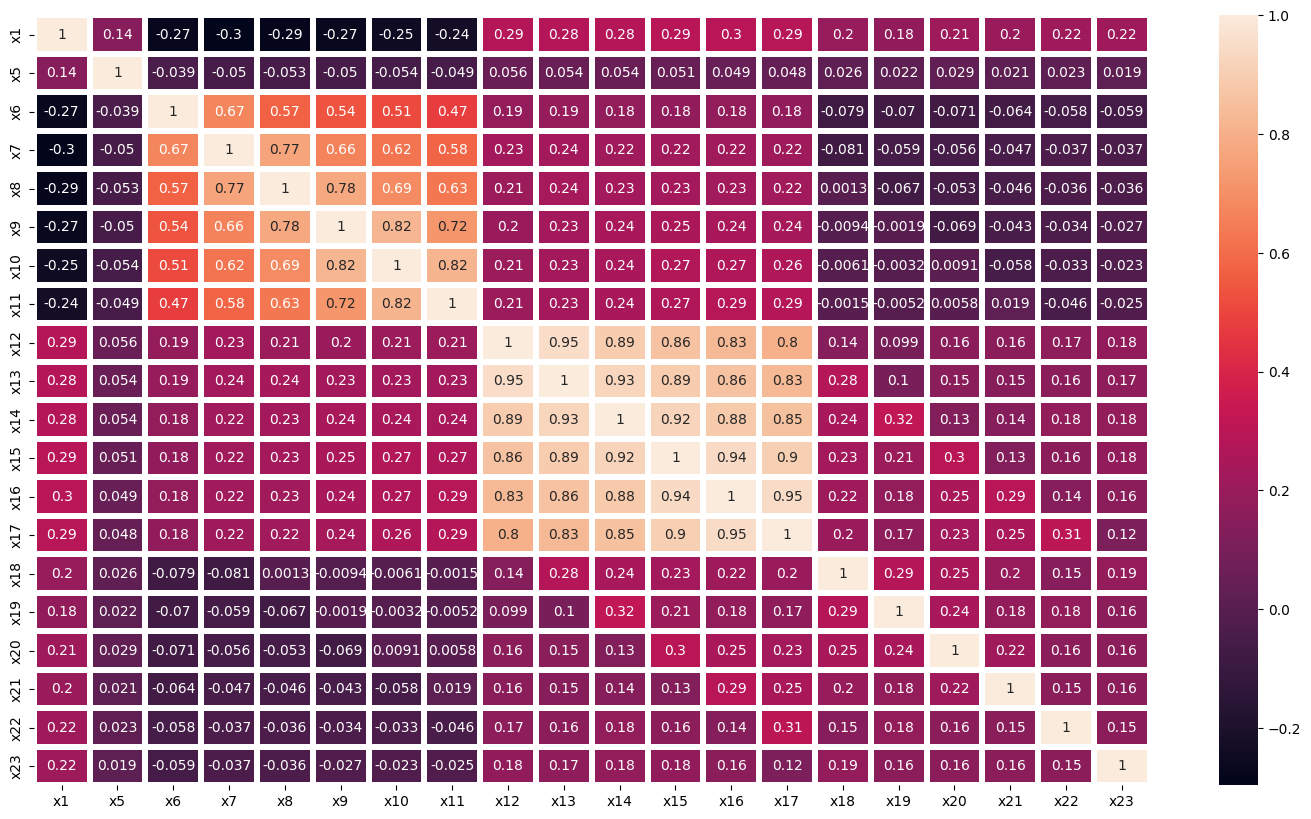

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df.drop(columns=nominal_cols).corr(),linewidths=4,annot=True)

In [ ]:
corr_dict = dict()
for col_x in df.drop(columns=nominal_cols).corr():
  for col_y in df.drop(columns=nominal_cols).corr():
    if col_x == col_y:
      pass
    else:
      corr = df.drop(columns=nominal_cols).corr().loc[col_x,col_y]
      if corr > 0.6 or corr < -0.6:
        cols_cors = [col_x,col_y]
        corr_dict[str(sorted(cols_cors))] = corr

for item in corr_dict.keys():
  print(item,'-', round(corr_dict[item],2))

['x6', 'x7'] - 0.67
['x7', 'x8'] - 0.77
['x7', 'x9'] - 0.66
['x10', 'x7'] - 0.62
['x8', 'x9'] - 0.78
['x10', 'x8'] - 0.69
['x11', 'x8'] - 0.63
['x10', 'x9'] - 0.82
['x11', 'x9'] - 0.72
['x10', 'x11'] - 0.82
['x12', 'x13'] - 0.95
['x12', 'x14'] - 0.89
['x12', 'x15'] - 0.86
['x12', 'x16'] - 0.83
['x12', 'x17'] - 0.8
['x13', 'x14'] - 0.93
['x13', 'x15'] - 0.89
['x13', 'x16'] - 0.86
['x13', 'x17'] - 0.83
['x14', 'x15'] - 0.92
['x14', 'x16'] - 0.88
['x14', 'x17'] - 0.85
['x15', 'x16'] - 0.94
['x15', 'x17'] - 0.9
['x16', 'x17'] - 0.95


**Insight 3** : We recognize **strong connections** (correlation) between the variables x6-x11: it seems that people's payment situation during the months is generally consistent - others tend to be late regularly.

**Insight 4** : We recognize **strong connections** (correlation) between the variables x12-x17: it seems that people's account status usually remains in a similar state between months.

**Insight 5** : We recognize **weak connections** in the credit payment amounts during the months examined - the amounts vary between months without a high correlation.

**Insight 6** : We recognize there is more data of 'no' than 'yes' in the target column.






---



# 3. Data Preparation

## **3.1. Feature Engineering**

1. We have no missing values in our data.
2. Our categorical features are already in label Encoded
3. We can make 3 new features referring to the columns in which we have identified a strong correlation :

  Average payment delays - a numeric variable that takes the value 0 if there were no delays and the value 9 if there were maximum delays.

  The average amount of the account in the months reviewed.

  Standard deviation for the amount of the account in the months examined.

  **As part of the model, we will examine whether they help us in analyzing the data and improving the prediction results**

In [ ]:
payment_delays = df[['x6', 'x7', 'x8', 'x9', 'x10', 'x11']]
df['average_payment_delays'] = payment_delays.mean(axis=1)
for index, value in df['average_payment_delays'].items():
    if value <= 0:
        df.at[index, 'average_payment_delays'] = 0
    else:
        df.at[index, 'average_payment_delays'] = round(value, 1)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,target,average_payment_delays
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.5
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.0


In [ ]:
amount = df[['x12', 'x13', 'x14', 'x15', 'x16', 'x17']]
df['average_amount'] = amount.mean(axis=1)
df['amount_std_dev'] = amount.std(axis=1)

df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x18,x19,x20,x21,x22,x23,target,average_payment_delays,average_amount,amount_std_dev
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,1284.000000,1761.633179
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.5,2846.166748,637.967834
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0,16942.166016,6064.518555
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0,38555.667969,10565.793945
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.0,18223.166016,10668.589844




---
## **3.2. Normalization and Standardization**


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
saved_df = df.copy()# keeping for the pipline

In [ ]:
numerical_df = df.drop(['x2', 'x3', 'x4', 'target'], axis=1)

# Apply MinMaxScaler to the numerical features
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(numerical_df)
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_df.columns.tolist())

# Combine scaled numerical features and nominal features into a new DataFrame
nominal_cols = ['x2', 'x3', 'x4', 'target']

df = pd.concat([scaled_numerical_df, df[nominal_cols]], axis=1)

In [ ]:
df.head()

,x1,x5,x6,x7,x8,x9,x10,x11,x12,x13,...,x21,x22,x23,average_payment_delays,average_amount,amount_std_dev,x2,x3,x4,target
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,...,0.000000,0.000000,0.000000,0.000000,0.061420,0.002719,2.0,2.0,1.0,1
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,...,0.001610,0.000000,0.003783,0.083333,0.063094,0.000985,2.0,2.0,2.0,1
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,...,0.001610,0.002345,0.009458,0.000000,0.078197,0.009362,2.0,2.0,2.0,0
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,...,0.001771,0.002506,0.001892,0.000000,0.101353,0.016311,2.0,2.0,1.0,0
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,...,0.014493,0.001615,0.001284,0.000000,0.079569,0.016469,1.0,2.0,1.0,0



---
## **3.3. Feature Selection**

Getting initial information about the all features together

In [ ]:
y = df['target']
X = df.drop('target', axis=1)

From RandomForest :

<Axes: ylabel='Feature'>

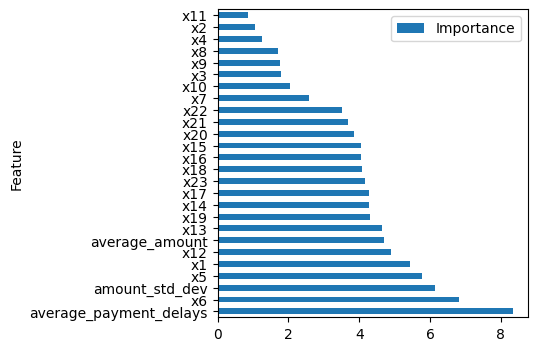

In [ ]:
RF = RandomForestClassifier(n_estimators=10, max_depth=32, random_state=42)
RF.fit(X,y)
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": RF.feature_importances_ * 100
})
importances = importances.sort_values("Importance", ascending=False)
importances.set_index("Feature").plot(kind="barh", figsize=(4,4))

In [ ]:
select = SelectFromModel(RandomForestClassifier(n_estimators=10, max_depth=32, random_state=42), threshold="median")
select.fit(X, y)
mask = select.get_support()
result = pd.DataFrame({
    "Features": X.columns,
    "Selected": mask
})
result

,Features,Selected
0,x1,True
1,x5,True
2,x6,True
3,x7,False
4,x8,False
5,x9,False
6,x10,False
7,x11,False
8,x12,True
9,x13,True


In [ ]:
selected_features_by_RF = result[result["Selected"] == True]["Features"].values
selected_features_by_RF

array(['x1', 'x5', 'x6', 'x12', 'x13', 'x14', 'x17', 'x18', 'x19', 'x23',
       'average_payment_delays', 'average_amount', 'amount_std_dev'],
      dtype=object)

From GBC :

In [ ]:
select = SelectFromModel(GradientBoostingClassifier(n_estimators=200, random_state=42), threshold="median")
select.fit(X, y)
mask = select.get_support()
result = pd.DataFrame({
    "Features": X.columns,
    "Selected": mask
})
result

,Features,Selected
0,x1,True
1,x5,True
2,x6,True
3,x7,True
4,x8,True
5,x9,False
6,x10,False
7,x11,False
8,x12,True
9,x13,False


In [ ]:
selected_features_by_GBC = result[result["Selected"] == True]["Features"].values
selected_features_by_GBC

array(['x1', 'x5', 'x6', 'x7', 'x8', 'x12', 'x17', 'x19', 'x20', 'x23',
       'average_payment_delays', 'average_amount', 'amount_std_dev'],
      dtype=object)

If we combine them into a set we get :

In [ ]:
selected_features = list(set(selected_features_by_RF).intersection(selected_features_by_GBC))
selected_features

['x17',
 'x6',
 'average_amount',
 'x1',
 'x19',
 'amount_std_dev',
 'average_payment_delays',
 'x23',
 'x5',
 'x12']

It can be seen that the variables engineered in the previous step are **indeed significant for the classification**, at the expense of the individual variables (especially in the first group of x6-11) and therefore there is a reason to examine the reduction of data reduction for the prediction process.

In [ ]:
y = df['target']
X = df[selected_features]
X.head()

,x17,x6,average_amount,x1,x19,amount_std_dev,average_payment_delays,x23,x5,x12
0,0.260979,0.4,0.061420,0.010101,0.000409,0.002719,0.000000,0.000000,0.051724,0.149982
1,0.263485,0.1,0.063094,0.111111,0.000594,0.000985,0.083333,0.003783,0.086207,0.148892
2,0.272928,0.2,0.078197,0.080808,0.000891,0.009362,0.000000,0.009458,0.224138,0.172392
3,0.283685,0.2,0.101353,0.040404,0.001199,0.016311,0.000000,0.001892,0.275862,0.188100
4,0.275681,0.1,0.079569,0.040404,0.021779,0.016469,0.000000,0.001284,0.620690,0.154144


<Axes: ylabel='Feature'>

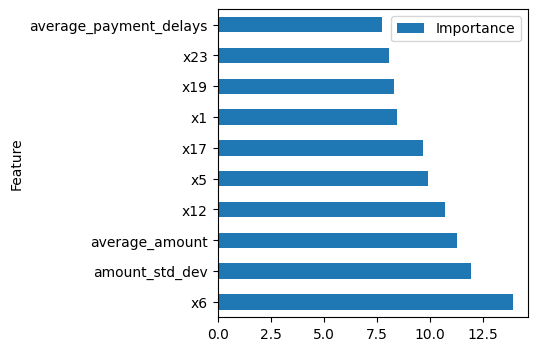

In [ ]:
RF = RandomForestClassifier(n_estimators=10, max_depth=32, random_state=42)
RF.fit(X,y)
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": RF.feature_importances_ * 100
})
importances = importances.sort_values("Importance", ascending=False)
importances.set_index("Feature").plot(kind="barh", figsize=(4,4))

We will perform an initial test of the random forest algorithm to see if better accuracy is obtained before or after Feature Engineering

In [ ]:
# for understanding the data
#payment_delays = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11']
#amount = ['x12', 'x13', 'x14', 'x15', 'x16', 'x17']

**Before :**

In [ ]:
df_Before_Feature_Engineering = df.drop(['average_payment_delays', 'average_amount', 'amount_std_dev'], axis=1)
y = df_Before_Feature_Engineering['target']
X = df_Before_Feature_Engineering.drop('target', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
RF = RandomForestClassifier(n_estimators=32, max_depth=12, random_state=42)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print("Accuracy after:",round(metrics.accuracy_score(y_test, y_pred),3))

Accuracy after: 0.819


**After :**

In [ ]:
df_After_Feature_Engineering = df.drop(['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17'], axis=1)
y = df_After_Feature_Engineering['target']
X = df_After_Feature_Engineering.drop('target', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
RF = RandomForestClassifier(n_estimators=32, max_depth=12, random_state=42)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print("Accuracy before:",round(metrics.accuracy_score(y_test, y_pred),3))

Accuracy before: 0.802


**Conclusions:**

1. Adding the variables on the amount of the account (average and standard deviation) do not contribute enough to the process - the accuracy value also decreases and it does not replace the original variables in the Feature Selection stage.

2. The standard deviation - is of high importance, so **we will add it** to the df.

3. The variable we created - **average_payment_delays** - replaces the existing features (x6-11) in a good way, so we will keep it.

Here is the final data :

In [ ]:
X = df[selected_features]
X = X.drop(['average_amount'], axis=1)
new_df = saved_df[X.columns]
X.head()

,x17,x6,x1,x19,amount_std_dev,average_payment_delays,x23,x5,x12
0,0.260979,0.4,0.010101,0.000409,0.002719,0.000000,0.000000,0.051724,0.149982
1,0.263485,0.1,0.111111,0.000594,0.000985,0.083333,0.003783,0.086207,0.148892
2,0.272928,0.2,0.080808,0.000891,0.009362,0.000000,0.009458,0.224138,0.172392
3,0.283685,0.2,0.040404,0.001199,0.016311,0.000000,0.001892,0.275862,0.188100
4,0.275681,0.1,0.040404,0.021779,0.016469,0.000000,0.001284,0.620690,0.154144


All the features are numerical

---
**Dimensionality Reduction**


In [ ]:
from sklearn import decomposition
import seaborn as sn
from sklearn.manifold import TSNE

df_pca = X.copy()

# Perform PCA on numeric columns (We have only 11 columns ----- > the reason we look for only 3 PCA column)

PCA = decomposition.PCA(n_components=3)
PCA = PCA.fit_transform(df_pca)
PCA = pd.DataFrame(PCA, columns=['PCA1','PCA2','PCA3'])

PCA

,PCA1,PCA2,PCA3
0,-0.277166,0.066611,-0.005149
1,-0.147841,-0.091192,-0.058540
2,-0.050828,0.009987,-0.073142
3,-0.023207,0.056296,-0.101353
4,0.290293,0.177653,-0.217671
...,...,...,...
29995,0.091332,-0.018381,0.054079
29996,0.128321,0.005211,-0.117247
29997,-0.168719,0.378423,0.148409
29998,0.023729,0.129015,-0.050071


In [ ]:
def plot_PCA(data, labels):
    pca_data = data
    pca_data = np.vstack((pca_data.T, labels)).T
    df = pd.DataFrame(data=pca_data, columns=("dim1", "dim2", "dim3", "Label"))
    sn.FacetGrid(df, hue="Label", height=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("PCA")
    plt.show()

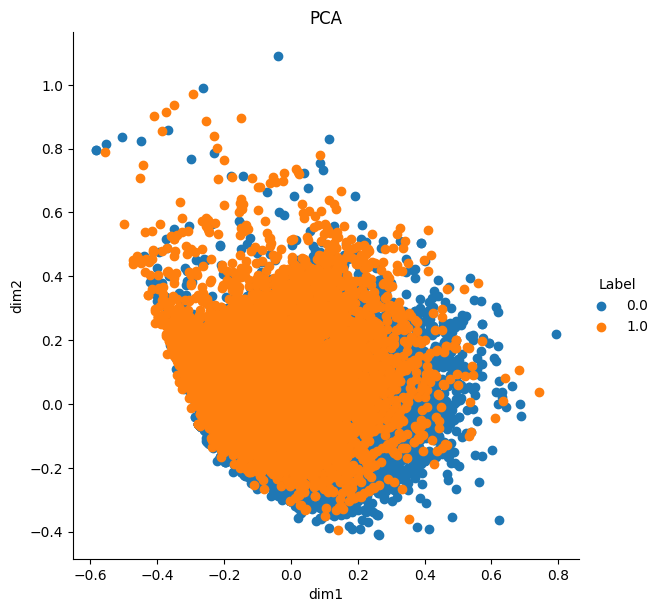

In [ ]:
plot_PCA(PCA, y)

The two dimensional graph doesn't give much information, so we performed three dimensions.

In [ ]:
import plotly.graph_objects as go

# Create the scatter plot data trace
scatter = go.Scatter3d(x=PCA['PCA1'], y=PCA['PCA2'], z=PCA['PCA3'], mode='markers',
    marker=dict(
        size=2,
        opacity=0.8,
        color=y,
        colorscale='Viridis',
        showscale=True
    ), text=y, name='Lable')

# Create the layout for the 3D plot
layout = go.Layout(scene=dict(xaxis=dict(title='PCA1'), yaxis=dict(title='PCA2'), zaxis=dict(title='PCA3')),)

# Create the figure object and add the scatter trace
fig = go.Figure(data=[scatter], layout=layout)

# Show the plot
fig.show()

Now that we have selected the most important features, normalized them and created a dimensionality reduction, the differences between the labels can be seen more clearly using the 3D graph



---



---
## **3.4. Pipelines**

In [ ]:
# Data for modeling - after feature selecting and without any transform of the data.
new_df.head()

,x17,x6,x1,x19,amount_std_dev,average_payment_delays,x23,x5,x12
0,0.0,2.0,20000.0,689.0,1761.633179,0.0,0.0,24.0,3913.0
1,3261.0,-1.0,120000.0,1000.0,637.967834,0.5,2000.0,26.0,2682.0
2,15549.0,0.0,90000.0,1500.0,6064.518555,0.0,5000.0,34.0,29239.0
3,29547.0,0.0,50000.0,2019.0,10565.793945,0.0,1000.0,37.0,46990.0
4,19131.0,-1.0,50000.0,36681.0,10668.589844,0.0,679.0,57.0,8617.0


In [ ]:
# we have only numerical cols
def build_pipeline(regressor,numeric_cols):
  num_pipe = make_pipeline(MinMaxScaler())
  transform = make_column_transformer((num_pipe,numeric_cols))
  # Give a name to the regressor so that we can tune it more easily
  return Pipeline(steps=[('preprocess', transform), ('reg', regressor)])

# 4. Modeling

## **4.1. Model Selection**

In [ ]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from tqdm.notebook import tqdm as tqdm

In [ ]:
numeric_cols = new_df.columns

In [ ]:
models = [RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), SVC(),MLPClassifier(),LogisticRegression(),LinearSVC()]
for m in tqdm(models): # nstantly make your loops show a smart progress meter
    pipe = build_pipeline(m,numeric_cols)
    scores = cross_val_score(pipe, new_df, y)
    print("R^2 score for {}: {:.3f}".format(m.__class__.__name__, scores.mean()))


  0%|          | 0/7 [00:00<?, ?it/s]

R^2 score for RandomForestClassifier: 0.814
R^2 score for GradientBoostingClassifier: 0.820
R^2 score for AdaBoostClassifier: 0.818
R^2 score for SVC: 0.820
R^2 score for MLPClassifier: 0.820
R^2 score for LogisticRegression: 0.809
R^2 score for LinearSVC: 0.806


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=0, test_size=0.25)
for m in tqdm(models):
  m.fit(X_train, y_train)
  print("{} Accuracy on training set: {:.3f}".format(m.__class__.__name__,m.score(X_train, y_train)))
  print("{} Accuracy on test set: {:.3f}".format(m.__class__.__name__,(m.score(X_test, y_test))))

  0%|          | 0/7 [00:00<?, ?it/s]

RandomForestClassifier Accuracy on training set: 0.998
RandomForestClassifier Accuracy on test set: 0.816
GradientBoostingClassifier Accuracy on training set: 0.825
GradientBoostingClassifier Accuracy on test set: 0.827
AdaBoostClassifier Accuracy on training set: 0.818
AdaBoostClassifier Accuracy on test set: 0.823
SVC Accuracy on training set: 0.778
SVC Accuracy on test set: 0.782
MLPClassifier Accuracy on training set: 0.763
MLPClassifier Accuracy on test set: 0.769
LogisticRegression Accuracy on training set: 0.778
LogisticRegression Accuracy on test set: 0.782
LinearSVC Accuracy on training set: 0.760
LinearSVC Accuracy on test set: 0.763


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


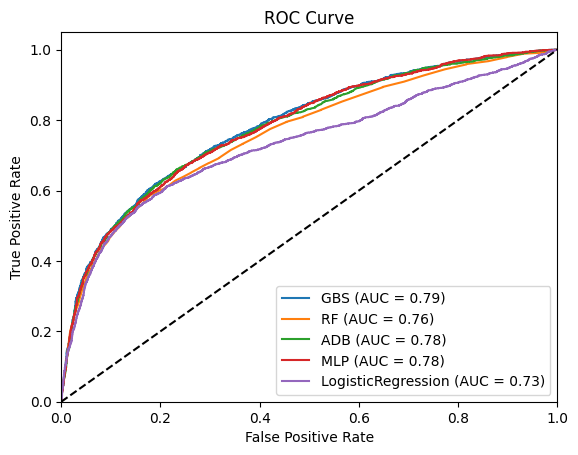

In [ ]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=0, test_size=0.3)

# For GradientBoostingClassifier
pipe1 = build_pipeline(GradientBoostingClassifier(),numeric_cols)
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)

y_pred_prob1 = pipe1.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)

# For RandomForestClassifier
pipe2 = build_pipeline(RandomForestClassifier(),numeric_cols)
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

y_pred_prob2 = pipe2.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)

# For AdaBoostClassifier
pipe3 = build_pipeline(AdaBoostClassifier(),numeric_cols)
pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)

y_pred_prob3 = pipe3.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_prob3)
roc_auc3 = auc(fpr3, tpr3)

# FOR MLP
pipe4 = build_pipeline(MLPClassifier(),numeric_cols)
pipe4.fit(X_train, y_train)
y_pred4 = pipe4.predict(X_test)

y_pred_prob4 = pipe4.predict_proba(X_test)[:, 1]
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_prob4)
roc_auc4 = auc(fpr4, tpr4)

# FOR LogisticRegression
pipe5 = build_pipeline(LogisticRegression(),numeric_cols)
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)

y_pred_prob5 = pipe5.predict_proba(X_test)[:, 1]
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_prob5)
roc_auc5 = auc(fpr5, tpr5)


plt.figure()
plt.plot(fpr1, tpr1, label='GBS (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='RF (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ADB (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='MLP (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='LogisticRegression (AUC = %0.2f)' % roc_auc5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Conclusion** The models except logistic regression behave the same, we will check the variability and bias of the models.

In [ ]:
def compute_bias_variance(clf, X, y):
    # Bootstraps
    n_repeat = 40 # 40 is on the low side to get a good estimate. 100 is better.
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat, random_state=0)

    # Store sample predictions
    y_all_pred = [[] for _ in range(len(y))]

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        clf.fit(X[train_index], y[train_index])
        y_pred = clf.predict(X[test_index])

        # Store predictions
        for j,index in enumerate(test_index):
            y_all_pred[index].append(y_pred[j])

    # Compute bias, variance, error
    bias_sq = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat for i,x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat for i,x in enumerate(y_all_pred)])
    error = sum([ (1 - x.count(y[i])/len(x)) * len(x)/n_repeat for i,x in enumerate(y_all_pred)])

    return np.sqrt(bias_sq), var, error

'''
Generic function: inputs classifier, X, y and plot the bias and variance ratio of the model.
'''
def plot_bias_variance_rf(clf, X, y):
    bias_scores = []
    var_scores = []
    err_scores = []
    n_estimators= [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

    for i in n_estimators:
        b,v,e = compute_bias_variance(clf.set_params(random_state=0,n_estimators=i),X,y)
        bias_scores.append(b)
        var_scores.append(v)
        err_scores.append(e)

    plt.figure(figsize=(10,4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(clf.__class__.__name__)
    plt.plot(n_estimators, var_scores, color="red", label ="variance" )
    plt.plot(n_estimators, np.square(bias_scores),color="green",label ="bias^2")
    plt.plot(n_estimators, err_scores,color="blue",label ="error" )
    plt.xscale('log',base=2)
    plt.xlabel("n_estimators")
    plt.legend(loc="best")
    plt.show()

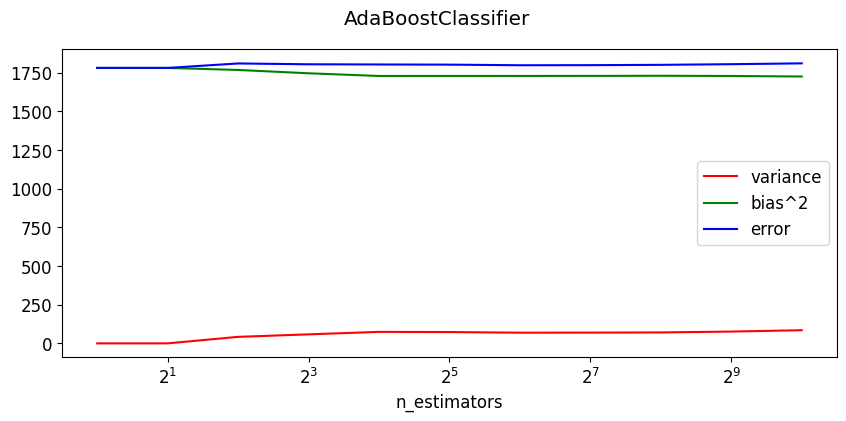

In [ ]:
ab = AdaBoostClassifier(random_state=99)
plot_bias_variance_rf(ab, X.values, y.values)

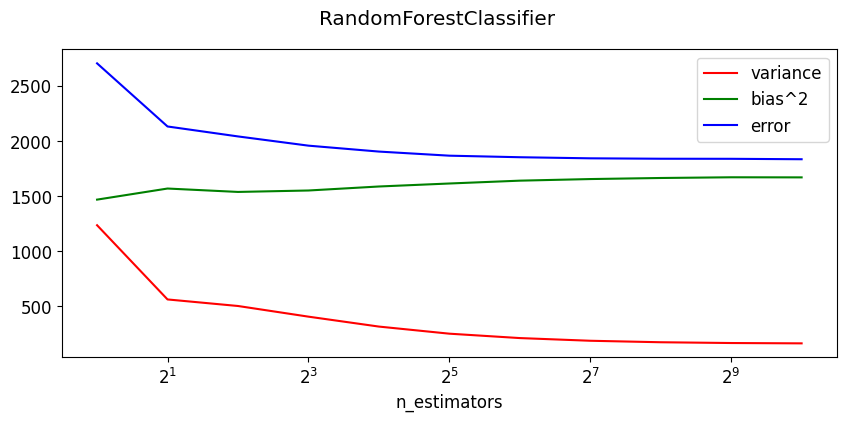

In [ ]:
rf = RandomForestClassifier(random_state=99)
plot_bias_variance_rf(rf, X.values, y.values)

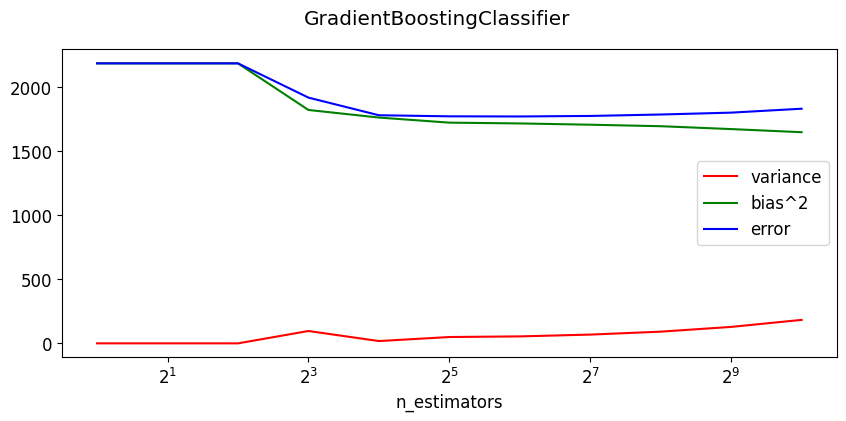

In [ ]:
gb = GradientBoostingClassifier(random_state=99)
plot_bias_variance_rf(gb, X.values, y.values)

**Conclusions**:
Our goal is to classify individuals as either defaulters or non-defaulters.

the reason we chose the GradientBoostingClassifier model:
1. The accuracy of the model in the training and test data sets is similar
2. The ROC curve shows the best performance.
3. The ratio of variance to bias remains constant.
4. We get the R^2 score is 0.82.


## 4.2 Hyperparameters

In [ ]:
def search_for_hyperparameters(X, y, model_name, model, param_grid):
    pipe = Pipeline([(model_name, model)])
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
    grid.fit(X, y)
    print("Test set score: {:.2f}".format(grid.score(new_df, y)))
    print("Best parameters: {}".format(grid.best_params_))

In [ ]:
gb_grid = {
    "gb__n_estimators": [50, 100, 150, 200, 250],
    "gb__learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
}

In [ ]:
search_for_hyperparameters(new_df, y, "gb", GradientBoostingClassifier(),gb_grid)

Test set score: 0.82
Best parameters: {'gb__learning_rate': 0.1, 'gb__n_estimators': 50}


**bold text**#5. Evaluation and Optimization

##5.1 First Results

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=0, test_size=0.3)
pipe = build_pipeline(GradientBoostingClassifier(),numeric_cols)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7060
           1       0.67      0.38      0.49      1940

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000



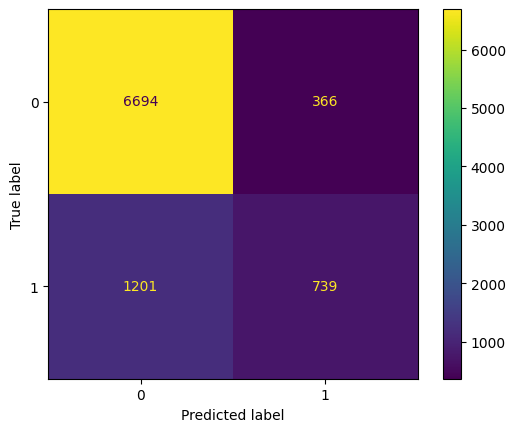

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipe.classes_)
vis.plot()
plt.show()

###The model manages to identify '0' (no) with high success. On the other hand, he has difficulty identifying '1'(yes).

###In our opinion, this is because there are not enough cases of '1' (yes) within the database.

## 5.2 Optimization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=0, test_size=0.3)
pipe = build_pipeline(GradientBoostingClassifier(learning_rate=0.1,n_estimators=50),numeric_cols)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7060
           1       0.67      0.37      0.48      1940

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000



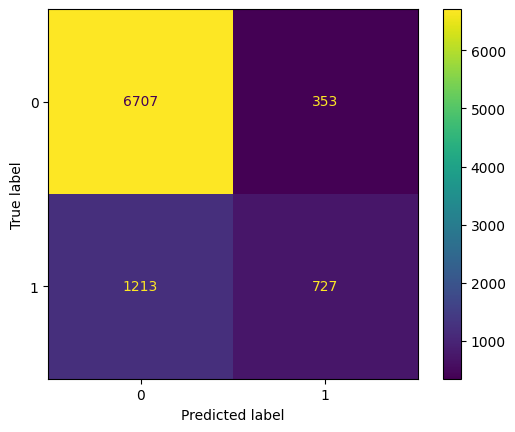

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipe.classes_)
vis.plot()
plt.show()

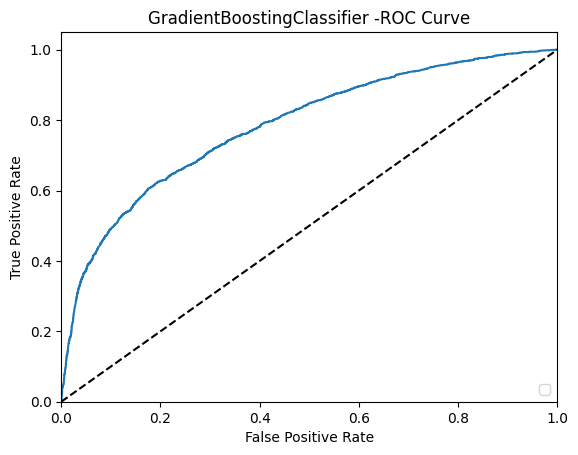

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoostingClassifier -ROC Curve')
plt.legend(loc="lower right")
plt.show()


During the research, we optimized the model in several ways :
1. **Finding the best model** against variance and other performance measures - we found GBC and ADB as the best models in terms of accuracy and chose them according to analysis of variance.
2. Choosing the **best parameters** for the model - a learning coefficient of 0.1 with 50 estimators.
3. Creating **new variables** using statistical operations for features - average_payment_delays and amount_std_dev.
4. Use of **dimension reduction** techniques - PCA with 3 dimensions.

**From the analysis of the confusion matrix** it can be learned that **there is a very good identification of the customers who are untrustworthy** (we can see it by analyzing the F1-Score), at the expense of a misdiagnosis of trustworthy customers who were also classified as untrustworthy.

## 5.3 Final Conclusions

**Final conclusions :**
1. The data set allows the organization to predict in a good way which customers can be classified as reliable customers and which not **(accuracy of 83%)** , in order to manage the loan resources in the organization alongside financial collateral.
2. Each customer's data has features that can be combined, including highly correlated features and some that can be omitted.
3. **We learn from the data** :

  3.1. People's payment status over the months seems to be generally consistent - people who are late tend to be regularly late.

  3.2. It seems that people's account status usually stays in a similar state between months.

  3.3. We identify weak relationships in the credit payment amounts during the months under review.
4. Based on the examination of machine learning models, it is possible to identify several models that describe a situation of overfitting (for example, Random forest).
5. The best tested models (Boosting models) differ in the variance component through which the best model for the business purpose - GBC - is selected.
6. There is a lack of instances of '1' (yes) within the database,the test set has a rate of 2:7 for the 'no'. For improving the model we have to collect more data for the 'yes' cases.
7. Finally, **it can be noted that there is a very good identification of the customers who are not reliable**, at the expense of an incorrect diagnosis of reliable customers who were also classified as unreliable.